## Compare rates from receiving rate pickle and packet list pickle

In [52]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt

In [53]:
pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/receiving_rate_per_episode.pickle"
l_rate = pd.read_pickle(pickle_path)
l_rate

defaultdict(dict,
            {0: {0: {'trace': '/home/dena/Documents/Gym_RTC/gym-example/traces/trace_300k.json',
               'receiving_rate': [[0, nan],
                [165866.66666666666, 112],
                [331733.3333333333, 147],
                [331733.3333333333, 216],
                [331333.3333333333, 285],
                [387333.3333333333, 332],
                [347733.3333333333, 408],
                [321600.0, 475],
                [393066.6666666667, 527],
                [294266.6666666667, 590],
                [351733.3333333333, 644],
                [307600.0, 710],
                [317733.3333333333, 757],
                [348933.3333333333, 831],
                [401200.0, 888],
                [391466.6666666667, 942],
                [372000.0, 995],
                [366400.0, 1046],
                [286266.6666666667, 1106],
                [286266.6666666667, 1166],
                [365600.0, 1242],
                [456666.6666666667, 1300],
       

In [54]:
df_rate = pd.DataFrame(l_rate[0][0]["receiving_rate"], columns=["rate_bps", "arrival_time_ms"])
df_rate

,rate_bps,arrival_time_ms
0,0.000000,NaN
1,165866.666667,112.0
2,331733.333333,147.0
3,331733.333333,216.0
4,331333.333333,285.0
...,...,...
996,401066.666667,59802.0
997,410266.666667,59859.0
998,405200.000000,59916.0
999,365333.333333,59994.0


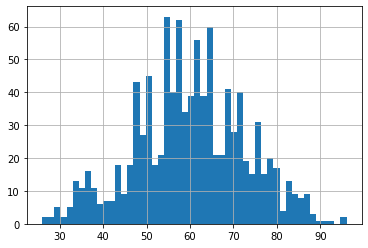

In [55]:
df_rate["arrival_time_ms"].diff().hist(bins=50)

In [57]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

episode = 0
epoch = 0

trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

for i in range(len(df_packets.ssrc.unique())):
    print(i)
    ssrc = df_packets["ssrc"].unique()[i]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])


0
1


In [59]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,112,24,0,1244,126,35,1,12648429
1,147,24,0,1244,126,45,2,12648429
2,181,24,0,1244,126,55,3,12648429
3,216,24,0,1244,126,65,4,12648429
4,251,24,0,1244,126,75,5,12648429
...,...,...,...,...,...,...,...,...
2191,59859,24,0,1013,126,56834,2279,12648429
2192,59888,24,0,1013,126,56869,2281,12648429
2193,59916,24,0,1013,126,56899,2283,12648429
2194,59945,24,0,1014,126,56904,2284,12648429


In [75]:
df_small = df[df.send_time_ms < 15290].copy()
df_small

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,112,24,0,1244,126,35,1,12648429
1,147,24,0,1244,126,45,2,12648429
2,181,24,0,1244,126,55,3,12648429
3,216,24,0,1244,126,65,4,12648429
4,251,24,0,1244,126,75,5,12648429
...,...,...,...,...,...,...,...,...
640,18127,24,0,767,126,15205,651,12648429
641,18148,24,0,768,126,15210,652,12648429
642,18170,24,0,767,126,15235,653,12648429
643,18192,24,0,768,126,15240,654,12648429


In [76]:
ssrc = df_packets["ssrc"].unique()[1]
df2 = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df2

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
645,18237,24,0,769,98,15290,1,195939069
684,19334,24,0,790,98,16310,2,195939069
699,19761,24,0,724,98,16765,5,195939069
709,20064,24,0,998,98,17020,7,195939069
715,20245,24,0,1293,98,17200,8,195939069
...,...,...,...,...,...,...,...,...
2129,58222,24,0,607,98,55209,250,195939069
2135,58377,24,0,1128,98,55359,251,195939069
2152,58813,28,0,1250,98,55854,252,195939069
2153,58826,24,0,436,98,55864,253,195939069


In [77]:
# df.join(df_rate, on="arrival_time_ms", lsuffix="_a")
df_small.merge(df_rate, on='arrival_time_ms', how='left').head(20)

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc,rate_bps
0,112,24,0,1244,126,35,1,12648429,165866.666667
1,147,24,0,1244,126,45,2,12648429,331733.333333
2,181,24,0,1244,126,55,3,12648429,NaN
3,216,24,0,1244,126,65,4,12648429,331733.333333
4,251,24,0,1244,126,75,5,12648429,NaN
5,285,28,0,1241,126,85,6,12648429,331333.333333
6,309,24,0,832,126,95,7,12648429,NaN
7,332,24,0,832,126,105,8,12648429,387333.333333
8,356,24,0,847,126,135,9,12648429,NaN
9,381,24,0,847,126,170,10,12648429,NaN


In [78]:
interval = 60

df_small["arrival_time_ms"] = df_small["arrival_time_ms"].astype('datetime64[ms]')
df_small = df_small.set_index("arrival_time_ms")

def calculate_rate(series):
    return (series.sum() * 8 * 1000 )/ interval

receiving_rate_series = df_small.resample(f"{interval}L").agg({"payload_size": calculate_rate})
receiving_rate_series

,payload_size
arrival_time_ms,
1970-01-01 00:00:00.060,165866.666667
1970-01-01 00:00:00.120,165866.666667
1970-01-01 00:00:00.180,331733.333333
1970-01-01 00:00:00.240,331333.333333
1970-01-01 00:00:00.300,334800.000000
...,...
1970-01-01 00:00:17.940,431200.000000
1970-01-01 00:00:18.000,206266.666667
1970-01-01 00:00:18.060,291200.000000


In [85]:
df_rate = df_rate[df_rate.arrival_time_ms < 15290]
df_rate

,rate_bps,arrival_time_ms
1,165866.666667,112.0
2,331733.333333,147.0
3,331733.333333,216.0
4,331333.333333,285.0
5,387333.333333,332.0
...,...,...
249,292933.333333,14982.0
250,359200.000000,15037.0
251,316000.000000,15103.0
252,374133.333333,15142.0


#1f77b4
#ff7f0e


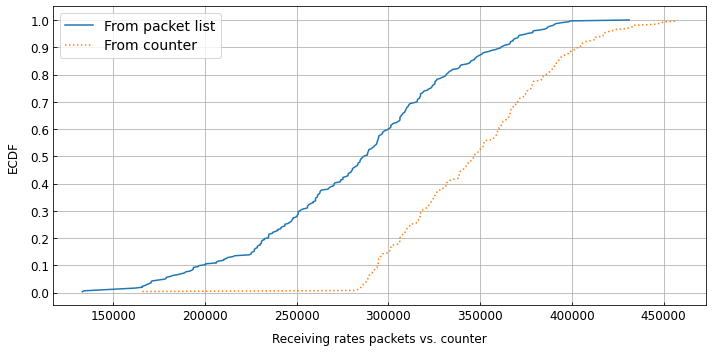

In [84]:
rates1 = receiving_rate_series["payload_size"]
rates2 = df_rate["rate_bps"]

plot_cdf_multiple(
                  [rates1, rates2],
                  x_label="Receiving rates packets vs. counter",
                  legend=["From packet list", "From counter"]
                 )
# plt.xlim(0,450)

# Warning: only do with flows with one ssrc!

In [2]:
def calculate_receiving_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
    df = df.set_index("arrival_time_ms")
    
    def calculate_rate(series):
#         interval = 100
        return (series.sum() * 8 * 1000 )/ interval

    receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return receiving_rate_series

In [9]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

time_step = 60
max_num_episodes = 3
to_plot_big = []
episode = 0
epoch = 0

trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

for i in range(len(df_packets.ssrc.unique())):
    print(i)
    ssrc = df_packets["ssrc"].unique()[i]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])

0


In [10]:
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,117,24,0,1431,126,35,1,12648429
1,157,24,0,1431,126,45,2,12648429
2,196,24,0,1432,126,55,3,12648429
3,236,24,0,1432,126,65,4,12648429
4,276,24,0,1432,126,85,5,12648429
...,...,...,...,...,...,...,...,...
2192,59878,24,0,696,126,57434,2193,12648429
2193,59898,24,0,696,126,57469,2194,12648429
2194,59918,24,0,696,126,57499,2195,12648429
2195,59946,24,0,934,126,57534,2196,12648429


In [16]:
time_step = 60
rates2 = calculate_rate_from_packet_list(df, time_step)["payload_size"]/1000
rates1 = df_rate["receiving_rate"]

In [17]:
rates1

time
0           0.000000
100         0.000000
200       375.866667
300       376.000000
400       469.466667
             ...    
99600     325.866667
99700     380.933333
99800     223.466667
99900     384.000000
100000    384.000000
Name: receiving_rate, Length: 1001, dtype: float64

In [18]:
rates2

arrival_time_ms
1970-01-01 00:00:00.060    187.866667
1970-01-01 00:00:00.120    188.000000
1970-01-01 00:00:00.180    376.000000
1970-01-01 00:00:00.240    281.466667
1970-01-01 00:00:00.300    287.333333
                              ...    
1970-01-01 00:00:59.700    361.733333
1970-01-01 00:00:59.760    325.866667
1970-01-01 00:00:59.820    224.133333
1970-01-01 00:00:59.880    156.133333
1970-01-01 00:00:59.940    384.000000
Freq: 60L, Name: payload_size, Length: 999, dtype: float64

In [33]:
a = rates2.reset_index()["payload_size"]
a

0      187.866667
1      188.000000
2      376.000000
3      281.466667
4      287.333333
          ...    
994    361.733333
995    325.866667
996    224.133333
997    156.133333
998    384.000000
Name: payload_size, Length: 999, dtype: float64

In [34]:
b = rates1[2:].reset_index()["receiving_rate"]
b

0      375.866667
1      376.000000
2      469.466667
3      308.400000
4      360.933333
          ...    
994    325.866667
995    380.933333
996    223.466667
997    384.000000
998    384.000000
Name: receiving_rate, Length: 999, dtype: float64

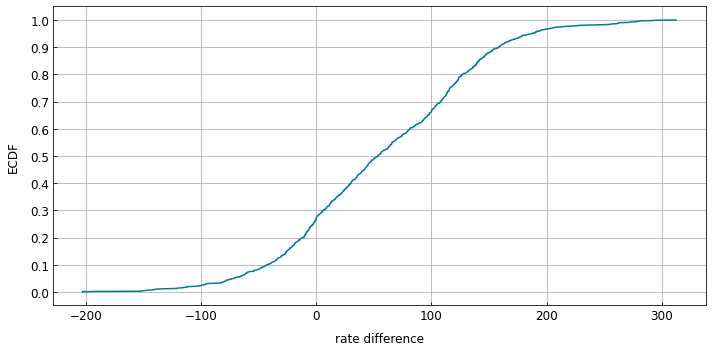

In [37]:
plot_cdf(b-a, "rate difference")

#1f77b4
#ff7f0e


(0.0, 450.0)

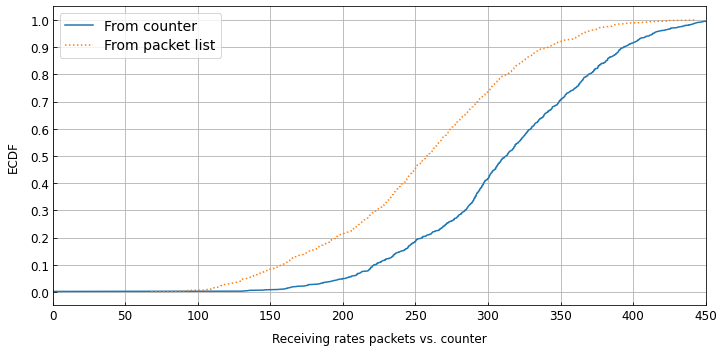

In [9]:
plot_cdf_multiple(
                  [rates1, rates2],
                  x_label="Receiving rates packets vs. counter",
                  legend=["From counter", "From packet list"]
                 )
plt.xlim(0,450)

## Calculate sending rate

In [66]:
def calculate_sending_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["send_time_ms"] = df["send_time_ms"].astype('datetime64[ms]')
    df = df.set_index("send_time_ms")
    
    def calculate_rate(series):
        return (series.sum() * 8 * 1000)/ interval

    sending_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return sending_rate_series

In [67]:
pickle_path2 = "/home/dena/Documents/Gym_RTC/gym-example/record_list_of_received_packets.pickle"
l_packets = pd.read_pickle(pickle_path2)

episode = 0
epoch = 0

trace_file = l_packets[episode][epoch]["trace"].split("/")[-1]
df_packets = pd.DataFrame(l_packets[episode][epoch]["list_of_packets"])

In [86]:
df_packets

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
0,117,24,0,1431,126,35,1,12648429
1,157,24,0,1431,126,45,2,12648429
2,196,24,0,1432,126,55,3,12648429
3,236,24,0,1432,126,65,4,12648429
4,276,24,0,1432,126,85,5,12648429
...,...,...,...,...,...,...,...,...
2192,59878,24,0,696,126,57434,2193,12648429
2193,59898,24,0,696,126,57469,2194,12648429
2194,59918,24,0,696,126,57499,2195,12648429
2195,59946,24,0,934,126,57534,2196,12648429


#### Plot sending rate from packet list

In [73]:
sending_rate = calculate_sending_rate_from_packet_list(df_packets)
sending_rate_df = sending_rate.reset_index().rename(columns={"payload_size": "sending_rate"})
sending_rate_df

,send_time_ms,sending_rate
0,1970-01-01 00:00:00.000,572533.333333
1,1970-01-01 00:00:00.060,572266.666667
2,1970-01-01 00:00:00.120,227200.000000
3,1970-01-01 00:00:00.180,173866.666667
4,1970-01-01 00:00:00.240,73600.000000
...,...,...
954,1970-01-01 00:00:57.240,265600.000000
955,1970-01-01 00:00:57.300,165066.666667
956,1970-01-01 00:00:57.360,324000.000000
957,1970-01-01 00:00:57.420,185600.000000


In [88]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df["send_time_ms"] = df["send_time_ms"].astype('datetime64[ms]')
df = df.set_index("send_time_ms")
df

,arrival_time_ms,header_length,padding_length,payload_size,payload_type,sequence_number,ssrc
send_time_ms,,,,,,,
1970-01-01 00:00:00.035,117,24,0,1431,126,1,12648429
1970-01-01 00:00:00.045,157,24,0,1431,126,2,12648429
1970-01-01 00:00:00.055,196,24,0,1432,126,3,12648429
1970-01-01 00:00:00.065,236,24,0,1432,126,4,12648429
1970-01-01 00:00:00.085,276,24,0,1432,126,5,12648429
...,...,...,...,...,...,...,...
1970-01-01 00:00:57.434,59878,24,0,696,126,2193,12648429
1970-01-01 00:00:57.469,59898,24,0,696,126,2194,12648429
1970-01-01 00:00:57.499,59918,24,0,696,126,2195,12648429


In [78]:
time_step = 60

episode = 0
epoch = 0
            
#Define rate
sending_rate_df

sending_rate_df["sending_rate"] = sending_rate_df["sending_rate"]/1000
t = np.arange(len(sending_rate_df))*time_step
sending_rate_df["time"] = t
sending_rate_df.set_index("time", inplace=True)
sending_rate_df

,send_time_ms,sending_rate
time,,
0,1970-01-01 00:00:00.000,572.533333
60,1970-01-01 00:00:00.060,572.266667
120,1970-01-01 00:00:00.120,227.200000
180,1970-01-01 00:00:00.180,173.866667
240,1970-01-01 00:00:00.240,73.600000
...,...,...
57240,1970-01-01 00:00:57.240,265.600000
57300,1970-01-01 00:00:57.300,165.066667
57360,1970-01-01 00:00:57.360,324.000000


In [93]:
# #Define capacity
trace_name = l_packets[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
print("Capacities", capacities)

Capacities [300, 300]


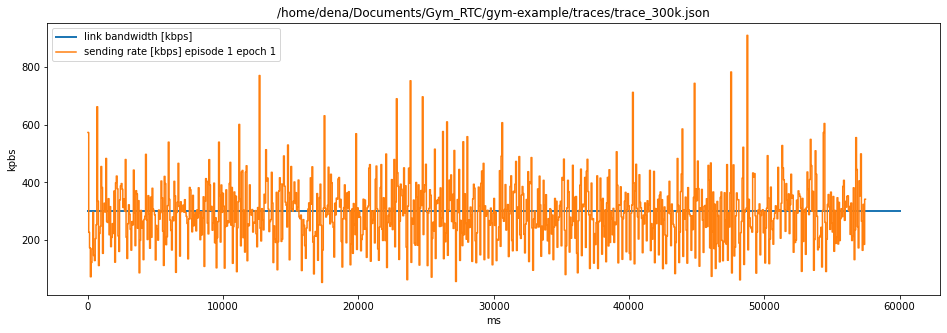

In [94]:
#Plot
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(sending_rate_df.index, sending_rate_df["sending_rate"], \
         label=f"sending rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,10)

## Receiving rate

In [ ]:
def calculate_receiving_rate_from_packet_list(df_packets, interval=60):
    #calculates rate for given packet list df_packets for given interval for the first ssrc
    
    ssrc = df_packets["ssrc"].unique()[0]
    df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
    df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
    df = df.set_index("arrival_time_ms")
    
    def calculate_rate(series):
#         interval = 100
        return (series.sum() * 8 * 1000 )/ interval

    receiving_rate_series = df.resample(f"{interval}L").agg({"payload_size": calculate_rate})
    
    return receiving_rate_series

In [85]:
receiving_rate = calculate_receiving_rate_from_packet_list(df_packets, interval=60)
receiving_rate_df = receiving_rate.reset_index().rename(columns={"payload_size": "receiving_rate"})
receiving_rate_df

,arrival_time_ms,receiving_rate
0,1970-01-01 00:00:00.060,190800.000000
1,1970-01-01 00:00:00.120,190800.000000
2,1970-01-01 00:00:00.180,381866.666667
3,1970-01-01 00:00:00.240,190933.333333
4,1970-01-01 00:00:00.300,363600.000000
...,...,...
994,1970-01-01 00:00:59.700,426533.333333
995,1970-01-01 00:00:59.760,165066.666667
996,1970-01-01 00:00:59.820,416800.000000
997,1970-01-01 00:00:59.880,185600.000000


In [90]:
ssrc = df_packets["ssrc"].unique()[0]
df = pd.DataFrame(df_packets[df_packets["ssrc"] == ssrc])
df["arrival_time_ms"] = df["arrival_time_ms"].astype('datetime64[ms]')
df = df.set_index("arrival_time_ms")
df

,header_length,padding_length,payload_size,payload_type,send_time_ms,sequence_number,ssrc
arrival_time_ms,,,,,,,
1970-01-01 00:00:00.117,24,0,1431,126,35,1,12648429
1970-01-01 00:00:00.157,24,0,1431,126,45,2,12648429
1970-01-01 00:00:00.196,24,0,1432,126,55,3,12648429
1970-01-01 00:00:00.236,24,0,1432,126,65,4,12648429
1970-01-01 00:00:00.276,24,0,1432,126,85,5,12648429
...,...,...,...,...,...,...,...
1970-01-01 00:00:59.878,24,0,696,126,57434,2193,12648429
1970-01-01 00:00:59.898,24,0,696,126,57469,2194,12648429
1970-01-01 00:00:59.918,24,0,696,126,57499,2195,12648429


In [91]:
time_step = 60

episode = 0
epoch = 0
            
#Define rate
receiving_rate_df

receiving_rate_df["receiving_rate"] = receiving_rate_df["receiving_rate"]/1000
t = np.arange(len(receiving_rate_df))*time_step
receiving_rate_df["time"] = t
receiving_rate_df.set_index("time", inplace=True)
receiving_rate_df

,arrival_time_ms,receiving_rate
time,,
0,1970-01-01 00:00:00.060,190.800000
60,1970-01-01 00:00:00.120,190.800000
120,1970-01-01 00:00:00.180,381.866667
180,1970-01-01 00:00:00.240,190.933333
240,1970-01-01 00:00:00.300,363.600000
...,...,...
59640,1970-01-01 00:00:59.700,426.533333
59700,1970-01-01 00:00:59.760,165.066667
59760,1970-01-01 00:00:59.820,416.800000


In [96]:
# #Define capacity
trace_name = l_packets[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])
print("Capacities", capacities)

Capacities [300, 300]


In [ ]:
#Plot
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(receiving_rate_df.index, receiving_rate_df["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,10)

## Plot both sending and receiving rate

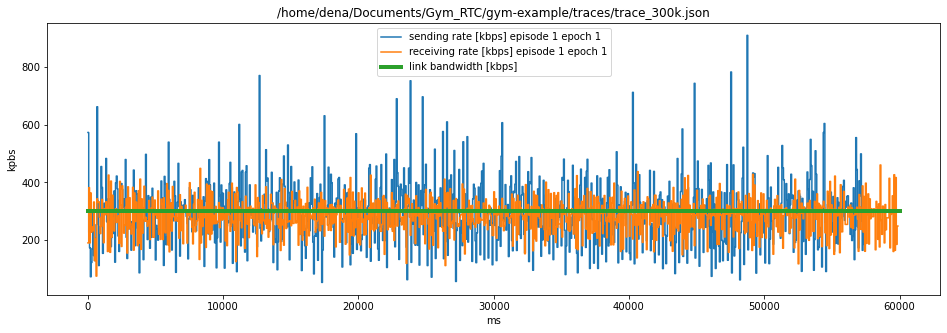

In [100]:
#Plot 
plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(sending_rate_df.index, sending_rate_df["sending_rate"], \
         label=f"sending rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.step(receiving_rate_df.index, receiving_rate_df["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.step(time, capacities, lw=4, label="link bandwidth [kbps]")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,10)
# plt.xlim(0,100)

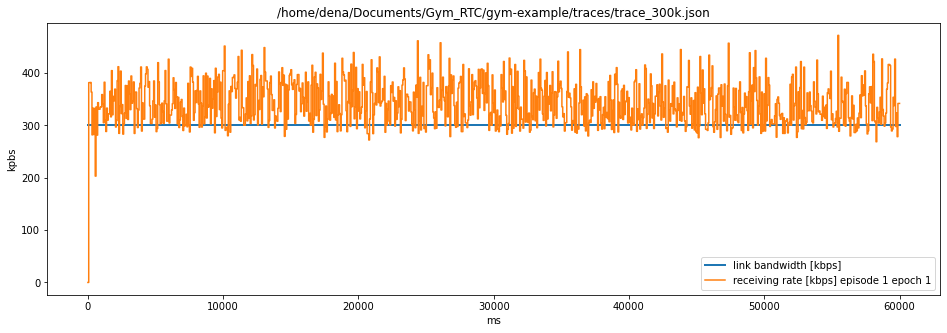

In [83]:
#### FROM RECEIVING_RATE_PER_EPISODE

pickle_path = "/home/dena/Documents/Gym_RTC/gym-example/receiving_rate_per_episode.pickle"
l_rate = pd.read_pickle(pickle_path)
time_step = 60
max_num_episodes = 3

episode = 0
epoch = 0
            
#Define rate
df_rate = pd.DataFrame(l_rate[episode][epoch]["receiving_rate"], columns=["receiving_rate", "arrival_time_ms"])
df_rate["receiving_rate"] = df_rate["receiving_rate"]/1000
t = np.arange(len(df_rate))*time_step
df_rate["time"] = t
df_rate.set_index("time", inplace=True)

#Define capacity
trace_name = l_rate[episode][epoch]["trace"]

with open(trace_name, "r") as f:
    d = json.load(f)

df = pd.DataFrame(d["uplink"]["trace_pattern"])
time = [0] + list(df["duration"].cumsum())
capacities = [df["capacity"].iloc[0]] + list(df["capacity"])

plt.figure(figsize=(16,5))
plt.title(trace_name)
plt.step(time, capacities, lw=2, label="link bandwidth [kbps]")
plt.step(df_rate.index, df_rate["receiving_rate"], \
         label=f"receiving rate [kbps] episode {episode+1} epoch {epoch+1}")
plt.ylabel("kpbs")
plt.xlabel("ms")
plt.legend()
# plt.ylim(0,500)
#             plt.xlim(0,10)